#                    **Google Play Reviews Sentiment Analysis**

                                             Project Type: Sentiment Analysis



> ***University:*** *International Burch University*


> ***Course:*** *IT 335 - Introduction to Natural Languages Processing*

> ***Students:*** *Sara Nalo & Ilma Gusinac*

                                                    January, 2024.


> **Introduction**

*Natural language processing (NLP)* is a branch of artificial intelligence, computer science, linguistics, and information engineering that studies how computers and human (natural) languages interact. It focuses on teaching computers how to process and analyze vast amounts of natural language data.

* Offering data analysis to developers to determine what customers are most likely to download and which category has the most downloads is essential to the app development process.
* With the implementation of machine learning and sentiment analysis using NLP, this project seeks to analyzing customer preferences and recommending to developers the ideal app to create.
* Using the dataset that is gathered from Kaggle, we will assist the users by classifying reviews and comments of the specific as neutral, negative, or favorable as well as give an overview forecast for the app category that will see the most downloads in the upcoming years.







> **Connecting Colab with Google Drive**


Interacting with Google Drive to mount the dataset content that is needed for the project. The dataset is located in the Google Drive section of the project.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




> **Dataset information**

The data contains over 12000 reviews of different app store applications by real users. As well as the rating that was given by them so it can be classified into positive or negative reviews.

- Twelve columns that make up the dataset are: 'reviewId' 'userName', 'userImage', 'content', 'score', 'thumbsUpCount' 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder' and 'appId'


# **1. Data reading**

* Initial step in reading and processing data from a CSV file called *reviews.csv.*
* Having an overview on the type of the columns that are present in the dataset

In [ ]:
# Import needed libraries
import pandas as pd
import os

# Read the files and assign them to apps, reviews values
reviews = pd.read_csv(r"/content/drive/MyDrive/nlp_project/reviews.csv")

# Print all unique values in 'score' column
print(reviews['score'].unique()) #scores are grouped together, so that 1 means that the user is not satisfied and 5 that it is satisfied

# Group reviews by score results
data = reviews.groupby(['score']).count().content.to_numpy()
data.sort()

# Print all column names in reviews dataset
print("*****************")
reviews.columns.values


[1 2 3 4 5]
*****************


array(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'sortOrder', 'appId'], dtype=object)

Concise summary of the reviews DataFrame, including information about the index dtype and column dtypes, non-null values, and memory usage. This summary provides an overview of the DataFrame's structure and the data types of its columns.

In [ ]:
# Print info and first 5 rows of dataset
print(reviews.info())
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16388 entries, 0 to 16387
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16388 non-null  object
 1   userName              16388 non-null  object
 2   userImage             16388 non-null  object
 3   content               16388 non-null  object
 4   score                 16388 non-null  int64 
 5   thumbsUpCount         16388 non-null  int64 
 6   reviewCreatedVersion  14028 non-null  object
 7   at                    16388 non-null  object
 8   replyContent          8488 non-null   object
 9   repliedAt             8488 non-null   object
 10  sortOrder             16388 non-null  object
 11  appId                 16388 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.5+ MB
None


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEcWS_b8b4P2gClKovxXAPg3il0AD0ZnGw9RxY...,H G,https://play-lh.googleusercontent.com/-2Zyc1Oz...,Unable to use it as it won't work with my Goog...,1,13,5.7.0.20,2021-01-11 01:12:58,"As our team explained profusely, we sync data ...",2021-01-10 12:58:09,most_relevant,com.anydo
1,gp:AOqpTOEidRmDaHGYPZW21SVfBkeqTruAzg7LAmCPL2_...,Michelle Armstrong,https://play-lh.googleusercontent.com/a-/AOh14...,I downloaded this because of the cross platfor...,1,81,5.7.0.20,2020-12-22 18:31:11,The Premium ad only shows up when first openin...,2020-12-23 19:58:46,most_relevant,com.anydo
2,gp:AOqpTOEJfVU5Os7_8CNOu_mpy2AlDz8kFxEFMeBMnxC...,Yiğitcan Sümbelli,https://play-lh.googleusercontent.com/a-/AOh14...,I am starting to hate this app! Every time the...,1,67,5.7.0.10,2020-12-02 15:52:24,"Hi, please note that these issues usually are ...",2020-12-03 20:47:02,most_relevant,com.anydo
3,gp:AOqpTOFSPaoOVarqwKF86e7-TPUyV6BanSXKRNFGb6G...,Jon Pember,https://play-lh.googleusercontent.com/-97UNn5D...,"Liked Any.do at first, enough that I even sign...",1,102,5.7.0.10,2020-11-22 23:42:56,Please note that Any.do integrates directly wi...,2020-11-25 13:30:01,most_relevant,com.anydo
4,gp:AOqpTOEmghRiCCy0_FYbWBSoRm2ff2hzFTbEjgQ9svu...,Harry Wexler Jr. MBA,https://play-lh.googleusercontent.com/a-/AOh14...,They made me sign up for premium just to have ...,1,2,5.7.0.20,2020-12-31 01:49:52,"We never require users to upgrade, as 90% of t...",2020-12-31 20:40:53,most_relevant,com.anydo


The column ***'content'*** is set to be the most important feature for this project, based on that we will get bit more in details about the sentiment analysis.

In [ ]:
# Print column 'content'
print(reviews['content'])

0        Unable to use it as it won't work with my Goog...
1        I downloaded this because of the cross platfor...
2        I am starting to hate this app! Every time the...
3        Liked Any.do at first, enough that I even sign...
4        They made me sign up for premium just to have ...
                               ...                        
16383                           Love this app so organized
16384                            Great place to keep notes
16385    This app helps me compartmentalize my hectic l...
16386                                             Love it!
16387                      Works well and don't bother you
Name: content, Length: 16388, dtype: object


Based on the ***'replyContent'***, there will be a more comprehensive understanding about the analysis with the information on the content, the given score and reply from the developer.

In [ ]:
# Print column 'replyContent'
print(reviews['replyContent'])

0        As our team explained profusely, we sync data ...
1        The Premium ad only shows up when first openin...
2        Hi, please note that these issues usually are ...
3        Please note that Any.do integrates directly wi...
4        We never require users to upgrade, as 90% of t...
                               ...                        
16383                                                  NaN
16384                                                  NaN
16385                                                  NaN
16386                                                  NaN
16387                                                  NaN
Name: replyContent, Length: 16388, dtype: object


To be able to fully understand everything that is going on with our dataset, it is needed to drop/delete unnecessary columns from the set, which means that the cleaning of the data begins with the droping columns set, since it will not be used for further prediction.


In [ ]:
# Delete/Drop columns reviewId, userName, userImage, thumbsUpCount, reviewCreatedVersion, at, repliedAt, appId and sortOrder since it will not be used for prediction

reviews.drop( 'reviewId', axis=1, inplace=True)
reviews.drop( 'userName', axis=1, inplace=True)
reviews.drop( 'userImage', axis=1, inplace=True)
reviews.drop( 'thumbsUpCount', axis=1, inplace=True)
reviews.drop( 'reviewCreatedVersion', axis=1, inplace=True)
reviews.drop( 'at', axis=1, inplace=True)
reviews.drop( 'repliedAt', axis=1, inplace=True)
reviews.drop( 'sortOrder', axis=1, inplace=True)
reviews.drop( 'appId', axis=1, inplace=True)
reviews.head() # printing first 5 rows from the cleaned dataset, with only 'content', 'score' and 'replyContent' columns

,content,score,replyContent
0,Unable to use it as it won't work with my Goog...,1,"As our team explained profusely, we sync data ..."
1,I downloaded this because of the cross platfor...,1,The Premium ad only shows up when first openin...
2,I am starting to hate this app! Every time the...,1,"Hi, please note that these issues usually are ..."
3,"Liked Any.do at first, enough that I even sign...",1,Please note that Any.do integrates directly wi...
4,They made me sign up for premium just to have ...,1,"We never require users to upgrade, as 90% of t..."


The ***'score'*** is set to be from [1-5], which gives freedom to users to give brief score for the app.
- On the graph, number *'3'*, is presented as the most repeted score in the distribution, which could actually be assumed as it represents the golden middle

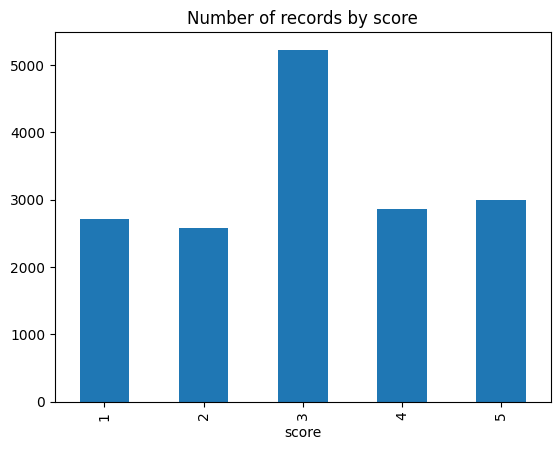

In [ ]:
# Plot a graf to represent the distribution

plot = reviews.groupby("score").size().plot(kind="bar", title="Number of records by score")

Null values could cause problem when performing the prediction and accuracy for the given set.
- Only ***'replyContent'*** has null values, just because there could be a chance that there isn't a reply to some content, and it is automatically set to null.

In [ ]:
# Checking for null values since they may cause problem in accuracy and later in prediction

reviews.isnull().sum() #sum of all nul values in reviews column

content            0
score              0
replyContent    7900
dtype: int64

# **2. Cleaning the dataset and preprocessing of the data - users reviews**

Cleaning and preprocessing the dataset ensures that the data is in optimal condition for analysis and model training. This section covers the steps involved in cleaning the dataset, filling in any missing values, and carrying out necessary preprocessing that is specific to the kind of user reviews.

- ***dropna()*** function removes rows where the *'replyContent'* column has null values.
- The subset parameter specifies the columns to consider, and inplace=True ensures that the changes are made directly to the original DataFrame (reviews), rather than creating a new one.

In [ ]:
# Delete all null values with function dropna(), we know they are in columns 'replyContent'

reviews.dropna(subset=['replyContent'], inplace=True)

reviews.isnull().sum() #here we ensure that there are no more null values that would not disrupt our prediction

content         0
score           0
replyContent    0
dtype: int64

Function, named ***cleanText()***, is designed to clean text data by removing various elements such as punctuation (except spaces), numbers, emojis, and converting the text to lowercase. This function can be applied to each text entry in a dataset to preprocess the textual data before analysis or model training.

In [ ]:
# Function to clean text data with regex from punctations, hyperlinks, non-alphabet characters and anything irrelevant

import re

def cleanText(text):
    text = re.sub("[^a-zA-Z']", '', text) # remove all punctuation except '
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.encode('ascii', 'ignore').decode('ascii')  # remove emojis
    text = text.lower() # convert to lowercase letters
    return text

***tokenizationAndCleaning()*** function is a comprehensive preprocessing step that combines tokenization, cleaning, lemmatization, and stop word removal to prepare text data.

In [ ]:
# Function to tokenize text, clean it using the previous function with regex and from stop words.
# Using the spacy library allows us to do tokenization, part-of-speech tagging and lemmatization in this function.
# !pip install spacy

import nltk
import spacy
nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm") # Specific identifier for the English language model with a small size. spaCy

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords) # All english stopwords

def tokenizationAndCleaning(text):
    # Tokenize using spaCy
    doc = nlp(text)

    # Clean and remove stop words
    cleanWordTokens = [cleanText(token.lemma_) for token in doc if token.is_alpha] # Retrieves lemmatized tokens (base forms of words) while excluding non-alphabetic tokens

    # Remove stop words
    cleanWordTokensFromStopwords = [w for w in cleanWordTokens if w.lower() not in stopwords]

    return " ".join(cleanWordTokensFromStopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Checking the correctness of the function, by testing the first sentence in the ***'content'*** column.

In [ ]:
# Testing out the functions on one of the reviews

sentence = reviews['content'][0]
print(sentence)

print("****************")

tokenizationAndCleaning(sentence)


Unable to use it as it won't work with my Google calendar. Tech support is horrible - "Tali" keeps asking for a screenshot of the native calendar she thinks came with the phone. It's a Motorola Edge that is all stock Android, thus Google calendar. They don't get it, and refuse to escalate my request for help to a higher level. EDIT: Now your team has a copy of the chat from Motorola explaining that there is no "native" calendar app other than Google. Since you know my case in this review area, your tech dept must be tiny. I really wanted to like this app, but it's very buggy with the Google calendar app it's advertised to work so well with.
****************


'unable use work google calendar tech support horrible tali keep ask screenshot native calendar think come phone motorola edge stock android thus google calendar get refuse escalate request help high level edit team copy chat motorola explain native calendar app google since know case review area tech dept must tiny really want like app buggy google calendar app advertise work well'

Applying the ***tokenizationAndCleaning*** function to each review in the *'content'* column of our DataFrame and storing the processed results in a new column named ***'processedContent'***. This is a common and necessary step in preparing text data for nlp.

In [ ]:
# Applying functions for all reviews in our dataset

reviews['processedContent'] = [tokenizationAndCleaning(review) for review in reviews['content']]

In [ ]:
# Print out our data set with the new column

reviews

,content,score,replyContent,processedContent
0,Unable to use it as it won't work with my Goog...,1,"As our team explained profusely, we sync data ...",unable use work google calendar tech support h...
1,I downloaded this because of the cross platfor...,1,The Premium ad only shows up when first openin...,download cross platform sync purchase app lear...
2,I am starting to hate this app! Every time the...,1,"Hi, please note that these issues usually are ...",start hate app every time update start exact p...
3,"Liked Any.do at first, enough that I even sign...",1,Please note that Any.do integrates directly wi...,liked first enough even sign premium could sch...
4,They made me sign up for premium just to have ...,1,"We never require users to upgrade, as 90% of t...",make sign premium recur alert even hourly opti...
...,...,...,...,...
16101,Good Planner overall,4,"Hi, if you have any ideas about improving the ...",good planner overall
16103,Works good,4,"Hi, if you have any ideas about improving the ...",work good
16105,Its very effective tool for daily tasks and ev...,4,"Hi, if you have any ideas about improving the ...",effective tool daily task event plus long term...
16106,Next best thing to using F. Covey when I was w...,4,"Hi, if you have any ideas about improving the ...",next good thing use covey work


Here we demonstrate the use of various stemmers and lemmatizers (Porter, Lancaster, WordNet, and spaCy) to a sample sentence. It prints the original sentence along with the results of each stemmer and lemmatizer, showcasing how these techniques modify or transform the words in the given sentence.

- In this specific case, the stemmers (Porter and Lancaster) don't have a noticeable impact on the sentence because they are designed to truncate words, and the sentence already contains a lot of short words.
- The lemmatizers (WordNet and spaCy) produce similar results, reducing words to their base forms.

In [ ]:
# Applying Stemmer and Lemmatizer to determine which works best for our dataset
# Library imports
"""import spacy
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import wordnet

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")

sentence = reviews['processedContent'][0] #  Sample sentence from 'processedContent' column

porterStemmer = nltk.PorterStemmer()
lancasterStemmer = nltk.LancasterStemmer()

print("Sentence: ", sentence)
print("------------------")
print("Porter stemmer: ", porterStemmer.stem(sentence))
print("------------------")
print("Lancaster stemmer: ", lancasterStemmer.stem(sentence))

print("------------------")

# wordNetLemmatizer = nltk.WordNetLemmatizer()
print("WordNet lemmatizer: ", wordNetLemmatizer.lemmatize(sentence))

print("------------------")
"""

'import spacy\nnltk.download(\'wordnet\')\nnltk.download(\'punkt\')\n\nfrom nltk.corpus import wordnet\n\n# Load spaCy English language model\nnlp = spacy.load("en_core_web_sm")\n\nsentence = reviews[\'processedContent\'][0] #  Sample sentence from \'processedContent\' column\n\nporterStemmer = nltk.PorterStemmer()\nlancasterStemmer = nltk.LancasterStemmer()\n\nprint("Sentence: ", sentence)\nprint("------------------")\nprint("Porter stemmer: ", porterStemmer.stem(sentence))\nprint("------------------")\nprint("Lancaster stemmer: ", lancasterStemmer.stem(sentence))\n\nprint("------------------")\n\n# wordNetLemmatizer = nltk.WordNetLemmatizer()\nprint("WordNet lemmatizer: ", wordNetLemmatizer.lemmatize(sentence))\n\nprint("------------------")\n'

Next, we experimented with different stemming and lemmatization techniques on the *'processedContent'* column of your DataFrame to observe their impact on the text. The last line of code indicates that we've chosen to use spaCy for lemmatization based on the best accuracy.

In [ ]:
# All results are the same based on the first sentence of the column, so we checked which accuracy is best

# reviews['processedContent'] = [porterStemmer.stem(review) for review in reviews['processedContent']]
# reviews['processedContent'] = [lancasterStemmer.stem(review) for review in reviews['processedContent']]
# reviews['processedContent'] = [wordNetLemmatizer.lemmatize(review) for review in reviews['processedContent']]

In [ ]:
# Check our dataset

# reviews

These next parts of the code are used to find and visualize the most frequent words in reviews that gave an app a score of 1/2/3/4/5. This is important for us to visualise and understand common complaints/issues/satisfaction/neutral thoughts reported by dissatisfied users.

*Most frequent words in reviews that gave an app a score of 1*

- Common complaints or issues reported by very dissatisfied users.

- The words in this list are individual tokens extracted from the reviews. They include a mix of nouns, verbs, adjectives, and other parts of speech. Commonly occurring words like "app", "update", "use", and "calendar" suggest key areas of user dissatisfaction or issues with the app.

- Here some words that are mostly used like "app" does not give us the emotion of a typical very dissatisfied user because most sentences begin or have the word "app" in them, because of the structure of it.


['unable', 'use', 'work', 'google', 'calendar', 'tech', 'support', 'horrible', 'tali', 'keep', 'ask', 'screenshot', 'native', 'calendar', 'think', 'come', 'phone', 'motorola', 'edge', 'stock', 'android', 'thus', 'google', 'calendar', 'get', 'refuse', 'escalate', 'request', 'help', 'high', 'level', 'edit', 'team', 'copy', 'chat', 'motorola', 'explain', 'native', 'calendar', 'app', 'google', 'since', 'know', 'case', 'review', 'area', 'tech', 'dept', 'must', 'tiny', 'really', 'want', 'like', 'app', 'buggy', 'google', 'calendar', 'app', 'advertise', 'work', 'well', 'download', 'cross', 'platform', 'sync', 'purchase', 'app', 'learn', 'free', 'version', 'see', 'potential', 'delete', 'constant', 'advertising', 'premium', 'version', 'keep', 'productive', 'counter', 'productive', 'seem', 'desktop', 'version', 'choice', 'calendar', 'see', 'day', 'day', 'week', 'month', 'pop', 'premium', 'anyway', 'next', 'planner', 'app', 'start', 'hate', 'app', 'every', 'time', 'update', 'start', 'exact', 'prob

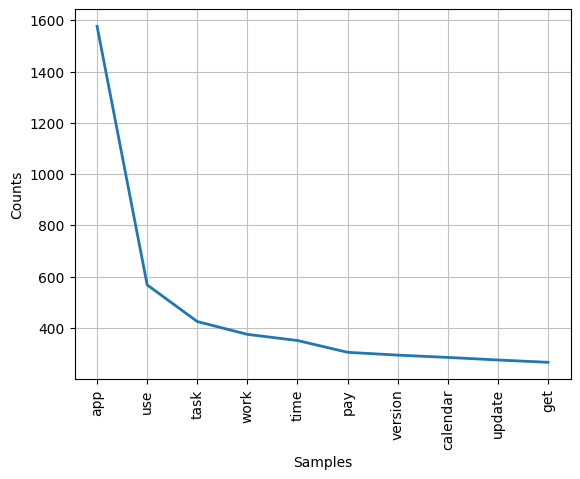

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Get data about most used words when the app score is 1

allWordsScoreOne = []

for review in reviews[reviews['score'] == 1]['processedContent']:
  for word in nltk.word_tokenize(review):
    allWordsScoreOne.append(word)

print(allWordsScoreOne)

nltk.FreqDist(allWordsScoreOne).plot(10)

*Most frequent words in reviews that gave an app a score of 2*

- Common complaints or issues reported by dissatisfied users.

- The words in this list are individual tokens extracted from the reviews. They include a mix of nouns, verbs, adjectives, and other parts of speech. Commonly occurring words like "get", "task", "use", and "time" suggest key areas of user dissatisfaction or issues with the app.
- Here some words that are mostly used like "app" does not give us the emotion of a typical dissatisfied user because most sentences begin or have the word "app" in them, because of the structure of it.

['keep', 'go', 'back', 'see', 'anything', 'fix', 'add', 'every', 'time', 'disappointed', 'smart', 'shopping', 'list', 'dumb', 'shopping', 'list', 'add', 'delete', 'category', 'stuck', 'whatever', 'category', 'seem', 'fit', 'give', 'grocery', 'base', 'plan', 'use', 'something', 'like', 'hardware', 'store', 'need', 'building', 'supplies', 'electrical', 'plumbing', 'etc', 'luck', 'even', 'add', 'quantity', 'usually', 'basic', 'feature', 'shopping', 'list', 'add', 'potato', 'many', 'know', 'great', 'much', 'use', 'year', 'recent', 'update', 'make', 'type', 'thing', 'randomly', 'highlight', 'word', 'remove', 'randomly', 'assign', 'date', 'even', 'though', 'press', 'today', 'infuriate', 'example', 'type', 'go', 'christmas', 'shopping', 'today', 'program', 'give', 'go', 'shop', 'today', 'assign', 'december', 'obviously', 'shoot', 'recent', 'update', 'make', 'app', 'much', 'bad', 'use', 'love', 'app', 'somehow', 'work', 'new', 'vivo', 'get', 'pop', 'regular', 'reminder', 'time', 'irritate', 'h

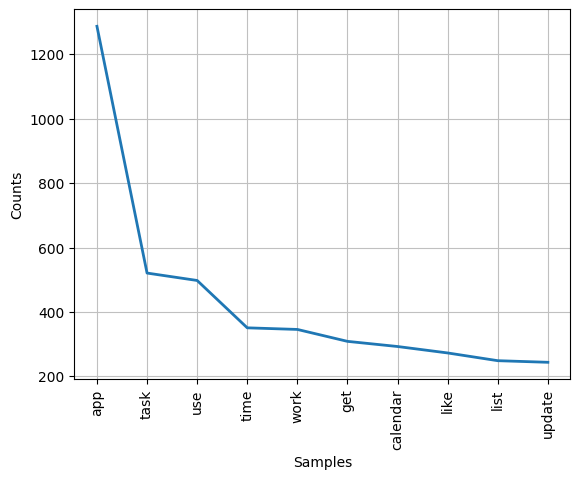

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Get data about most used words when the app score is 2

allWordsScoreTwo = []

for review in reviews[reviews['score'] == 2]['processedContent']:
  for word in nltk.word_tokenize(review):
    allWordsScoreTwo.append(word)

print(allWordsScoreTwo)

nltk.FreqDist(allWordsScoreTwo).plot(10)

*Most frequent words in reviews that gave an app a score of 3*

- Common neutral complaints or issues reported by neutral users.

- The words in this list are individual tokens extracted from the reviews. They include a mix of nouns, verbs, adjectives, and other parts of speech. Commonly occurring words like "good", "work", "get", and "like" suggest key areas of users neutral response.
- Here some words that are mostly used like "app" does not give us the emotion of a typical neutral user because most sentences begin or have the word "app" in them, because of the structure of it.

['good', 'app', 'small', 'inconvenience', 'finish', 'type', 'use', 'back', 'swipe', 'gesture', 'close', 'keyboard', 'happen', 'instead', 'go', 'back', 'type', 'close', 'current', 'view', 'also', 'manually', 'close', 'keyboard', 'finish', 'type', 'keyboard', 'stay', 'type', 'close', 'leave', 'app', 'keyboard', 'even', 'stay', 'check', 'recent', 'app', 'app', 'use', 'app', 'probably', 'year', 'love', 'tho', 'lately', 'slow', 'use', 'auto', 'save', 'every', 'action', 'hit', 'save', 'sometimes', 'save', 'lot', 'time', 'even', 'save', 'go', 'back', 'pen', 'paper', 'also', 'really', 'miss', 'grid', 'view', 'big', 'blue', 'box', 'represent', 'folder', 'would', 'nice', 'add', 'thing', 'list', 'ask', 'want', 'bottom', 'first', 'list', 'change', 'calendar', 'feature', 'really', 'make', 'experience', 'bad', 'become', 'difficult', 'identify', 'day', 'appointment', 'click', 'day', 'roll', 'way', 'see', 'hour', 'please', 'fix', 'return', 'previous', 'version', 'really', 'enjoy', 'app', 'want', 'chan

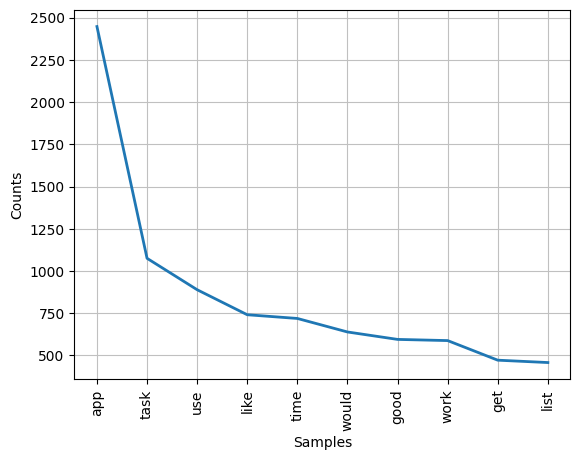

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Get data about most used words when the app score is 3

allWordsScoreThree = []

for review in reviews[reviews['score'] == 3]['processedContent']:
  for word in nltk.word_tokenize(review):
    allWordsScoreThree.append(word)

print(allWordsScoreThree)

nltk.FreqDist(allWordsScoreThree).plot(10)

*Most frequent words in reviews that gave an app a score of 4*

- Common pleased replies reported by satisfied users.

- The words in this list are individual tokens extracted from the reviews. They include a mix of nouns, verbs, adjectives, and other parts of speech. Commonly occurring words like "like", "would", "use", and "great" suggest key areas of users satisfied response.

- Here some words that are mostly used like "app" does not give us the emotion of a typical neutral user because most sentences begin or have the word "app" in them, because of the structure of it.

['nearly', 'perfect', 'like', 'ability', 'separate', 'alexa', 'shopping', 'list', 'someday', 'list', 'keep', 'upcoming', 'item', 'upcoming', 'list', 'without', 'move', 'today', 'automatically', 'procrastinate', 'lot', 'option', 'always', 'well', 'also', 'understand', 'desire', 'keep', 'complicate', 'app', 'beyond', 'great', 'happy', 'wish', 'version', 'could', 'buy', 'plan', 'would', 'pay', 'lot', 'buy', 'full', 'version', 'never', 'also', 'event', 'editable', 'use', 'samsung', 'account', 'also', 'add', 'button', 'minimise', 'complete', 'task', 'archive', 'like', 'keep', 'daily', 'schedule', 'want', 'show', 'time', 'regular', 'list', 'app', 'look', 'great', 'limited', 'add', 'note', 'specific', 'day', 'add', 'calander', 'unless', 'connect', 'email', 'calander', 'stake', 'white', 'color', 'scheme', 'change', 'unless', 'buy', 'premium', 'year', 'would', 'love', 'see', 'daily', 'note', 'option', 'text', 'editing', 'allow', 'ability', 'add', 'calander', 'without', 'sync', 'google', 'calend

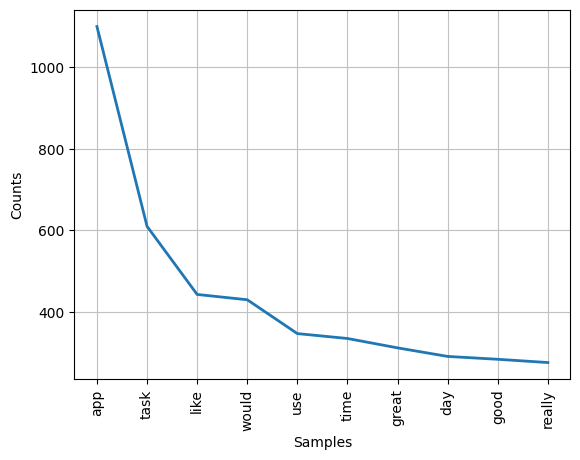

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Get data about most used words when the app score is 4

allWordsScoreFour = []

for review in reviews[reviews['score'] == 4]['processedContent']:
  for word in nltk.word_tokenize(review):
    allWordsScoreFour.append(word)

print(allWordsScoreFour)

nltk.FreqDist(allWordsScoreFour).plot(10)

*Most frequent words in reviews that gave an app a score of 5*

- Common highly pleased replies reported by very satisfied users.

- The words in this list are individual tokens extracted from the reviews. They include a mix of nouns, verbs, adjectives, and other parts of speech. Commonly occurring words like "love", "good", "great", and "really" suggest key areas of users very satisfied response.

- Here some words that are mostly used like "app" does not give us the emotion of a typical neutral user because most sentences begin or have the word "app" in them, because of the structure of it.

['love', 'app', 'look', 'stunning', 'clean', 'personally', 'important', 'everything', 'work', 'smoothly', 'set', 'reminder', 'task', 'repetition', 'note', 'etc', 'one', 'thing', 'like', 'subtask', 'able', 'appear', 'main', 'task', 'page', 'main', 'task', 'maybe', 'button', 'toggle', 'already', 'sure', 'access', 'excited', 'use', 'app', 'organized', 'usually', 'use', 'planner', 'app', 'quite', 'confusing', 'fill', 'phone', 'notification', 'app', 'actually', 'help', 'productive', 'plan', 'need', 'want', 'along', 'really', 'helpful', 'pop', 'remind', 'time', 'time', 'give', 'option', 'snooze', 'pop', 'anytime', 'would', 'recommend', 'app', 'want', 'organised', 'productive', 'really', 'really', 'nice', 'app', 'miss', 'feature', 'like', 'see', 'instance', 'sort', 'hard', 'schedule', 'day', 'work', 'well', 'list', 'arduous', 'process', 'however', 'interface', 'great', 'schedule', 'reminder', 'work', 'well', 'free', 'app', 'like', 'trello', 'todoist', 'remove', 'planner', 'list', 'grocery', '

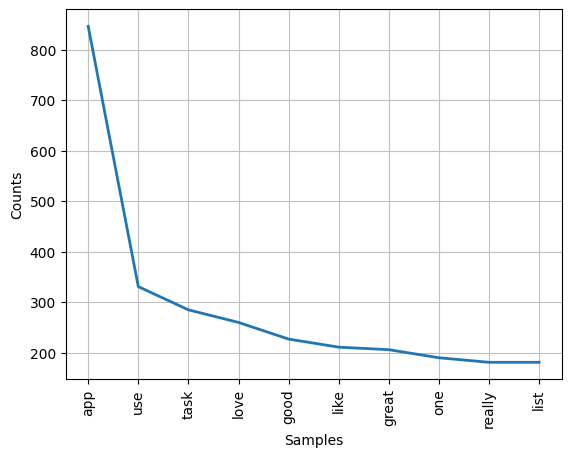

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Get data about most used words when the app score is 5

allWordsScoreFive = []

for review in reviews[reviews['score'] == 5]['processedContent']:
  for word in nltk.word_tokenize(review):
    allWordsScoreFive.append(word)

print(allWordsScoreFive)

nltk.FreqDist(allWordsScoreFive).plot(10)

Preparing the dataset for ML model.
- Extracting the 'processedContent' -> our feature in dataset (features) and 'score' -> our class label in dataset (label), column from reviews DataFrame and assigning it to the variable X and Y.

The print(X) and print(y) statements are just for understanding purposes.

In [ ]:
# Take the features - 'processedContent' column as X variable and class - 'score' column as Y variable

X = reviews['processedContent'] # this is our feature in dataset - features
y = reviews['score'] # this is our class label in dataset - label

print(X)
print(y)

0        unable use work google calendar tech support h...
1        download cross platform sync purchase app lear...
2        start hate app every time update start exact p...
3        liked first enough even sign premium could sch...
4        make sign premium recur alert even hourly opti...
                               ...                        
16101                                 good planner overall
16103                                            work good
16105    effective tool daily task event plus long term...
16106                       next good thing use covey work
16116    excellent application would give star followin...
Name: processedContent, Length: 8488, dtype: object
0        1
1        1
2        1
3        1
4        1
        ..
16101    4
16103    4
16105    4
16106    4
16116    4
Name: score, Length: 8488, dtype: int64


*Transforming text features into numeric values to count occurance of
each word in whole dataset for each row*
- ***CountVectorizer()*** represented as a feature extraction technique in scikit-learn that is used to transforms the text data into a numerical format by counting the occurrence of each word (token) in the dataset.

- ***fit_transform()*** method is applied to the 'processedContent' column (X). This method learns the vocabulary and returns a document-term matrix, where each row corresponds to a document (review), and each column corresponds to a unique word in the entire dataset. The values in the matrix represent the count of each word in the respective document.

In [ ]:
# Transforming text features into numeric values to count occurance of each word in whole dataset for each row

# Importing necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

tf = CountVectorizer() # Creating an instance of CountVectorizer
x_tf = tf.fit_transform(X) # Transforming the 'processedContent' column (X) into numeric values

Dividing dataset into train and test sets
- ***train_test_split()*** function is part of scikit-learn and is used for splitting arrays or matrices into random train and test subsets. In this case, it is applied to the transformed feature matrix (x_tf) and the target variable (y).

In [ ]:
# Dividing dataset into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_tf, y, test_size = 0.2, stratify = y)

# **3. Trainig a model for prediction and evaluating the model - users reviews**



>  Introduction


With the dataset refined and preprocessed, the focus shifts to constructing a robust model capable of predicting sentiment or scores from user reviews. This section dives into the training phase, where algorithms learn patterns from the prepared data. Additionally, we explore the evaluation of the model, assessing its performance metrics and ensuring its effectiveness in handling real-world user sentiments.

- ***RandomForestClassifier***: type of ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes as the prediction for classification tasks.
- Model is trained using the training sets *(X_train and y_train)*. This process involves the model learning the patterns and relationships within the provided data to make predictions later.

In [ ]:
# Training model with train sets

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier() # Instantiate the RandomForestClassifier
model.fit(X_train,y_train) # Fit the model using the training sets

RandomForestClassifier()

> Evaluate the accuracy of the model with test datasets

Interpreting the accuracy score:
- An accuracy of 1.0 (100%) would mean that all instances in the test dataset were correctly classified.
- An accuracy of 0.0 (0%) would indicate that none of the instances were classified correctly.

Score higher than 85% is presented as the best possible accuracy.

In [ ]:
# Evaluate the accuracy of the model with test datasets 85>

model.score(X_test, y_test)

0.7037691401648999

> Confusion matrix

Using confusion matrix: visualize the predicted values and assess how well the model is performing for each class (in this case, each score: 1, 2, 3, 4, 5).

Each confusion matrix consists of four values:
- **True Positive** (*TP*): Instances correctly predicted as the positive class.
- **True Negative** (*TN*): Instances correctly predicted as the negative class.
- **False Positive** (*FP*): Instances incorrectly predicted as the positive class.
- **False Negative** (*FN*): Instances incorrectly predicted as the negative class.

In [ ]:
# With Confusion Matrix visualize the predicted values, which are predicted correct which not

from sklearn.metrics import multilabel_confusion_matrix

y_pred = model.predict(X_test) # Predicting values for the test dataset
cf_matrix = multilabel_confusion_matrix(y_test, y_pred, labels=[1,2,3,4,5]) # Creating a multilabel confusion matrix
print(cf_matrix)

[[[1259   78]
  [ 105  256]]

 [[1346   31]
  [ 139  182]]

 [[ 743  351]
  [  61  543]]

 [[1427   29]
  [ 113  129]]

 [[1514   14]
  [  85   85]]]


Confusion matrix for score 1 indicates that above 1200 predictions of the model were ***True Negative***, which means the model correctly predicted the negative class. In simpler terms, the model correctly said “No” when it was indeed “No”. Between 200 and 400 predictions were ***True Positives***, which indicates that the model correctly predicted the positive class, meaning that the model correctly said “Yes” when it was indeed “Yes”. Both ***False Negatives*** and ***False Positives*** were below 200, and both of these mean that the model incorrectly predicted negative class when the true class was positive, and the model incorrectly predicted positive class when the true class was negative, respectively.


<Axes: >

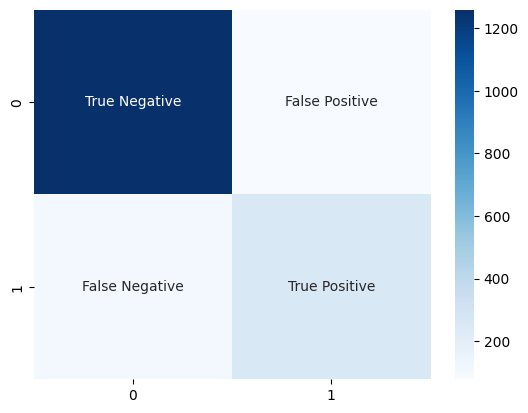

In [ ]:
import seaborn as sns
import numpy as np

#Confusion Matrix for first class - Score 1

labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[0], annot=labels, fmt='', cmap='Blues')

Confusion matrix for score 2 indicates that above 1200 predictions of the model were ***True Negative***, which means the model correctly predicted the negative class. In simpler terms, the model correctly said “No” when it was indeed “No”. Between 200 and 400 predictions were ***True Positives***, which indicates that the model correctly predicted the positive class, meaning that the model correctly said “Yes” when it was indeed “Yes”. Both ***False Negatives*** and ***False Positives*** were below 200, and both of these mean that the model incorrectly predicted negative class when the true class was positive, and the model incorrectly predicted positive class when the true class was negative, respectively.

<Axes: >

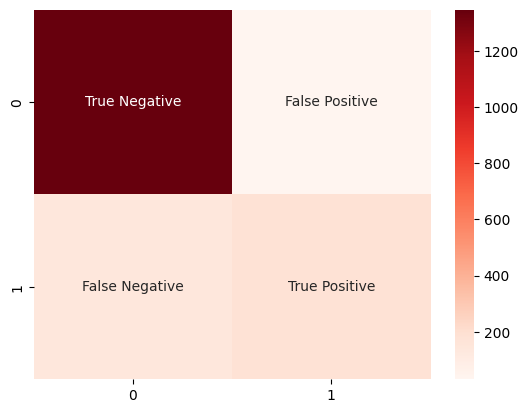

In [ ]:
# Confusion Matrix for second class - Score 2

labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[1], annot=labels, fmt='', cmap='Reds')

Confusion matrix for score 3 indicates that above 700 predictions of the model were ***True Negative***, which means the model correctly predicted the negative class. In simpler terms, the model correctly said “No” when it was indeed “No”. Between 500 and 600 predictions were ***True Positives***, which indicates that the model correctly predicted the positive class, meaning that the model correctly said “Yes” when it was indeed “Yes”. Between 200 and 300 predictions were ***False Positives***, which means that the model incorrectly predicted positive class when the true class was negative. ***False Negative*** predictions were below 100, and this tells us that the model incorrectly predicted negative class when the true class was positive.


<Axes: >

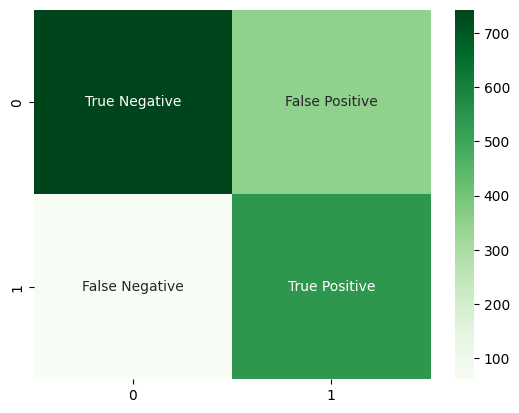

In [ ]:
# Confusion Matrix for third class - Score 3

labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[2], annot=labels, fmt='', cmap='Greens')

Confusion matrix for score 4 indicates that above 1200 predictions of the model were ***True Negative***, which means the model correctly predicted the negative class. In simpler terms, the model correctly said “No” when it was indeed “No”. Both ***True Positives*** and ***False Negatives*** were between 400 and 600, which indicates that the model correctly predicted the positive class, meaning that the model correctly said “Yes” when it was indeed “Yes”, and the model incorrectly predicted a negative class when the true class was positive, respectively. ***False Positive*** predictions were below 200, and this tells us that the model incorrectly predicted positive class when the true class was negative.

<Axes: >

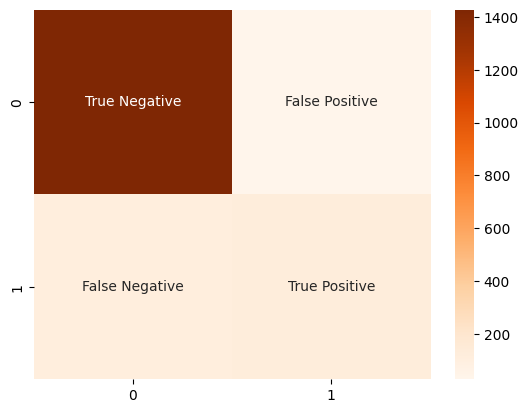

In [ ]:
# Confusion Matrix for third class - Score 4

labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[3], annot=labels, fmt='', cmap='Oranges')

Confusion matrix for score 5 indicates that above 1400 predictions of the model were ***True Negative***, which means the model correctly predicted the negative class. In simpler terms, the model correctly said “No” when it was indeed “No”. ***True Positives***, ***False Positives*** and ***False Negatives*** were all below 200, where True Positive means that the model correctly predicted the positive class, False Positive that the model incorrectly predicted positive class when the true class was negative, and False Negative that the model incorrectly predicted a negative class when the true class was positive.


<Axes: >

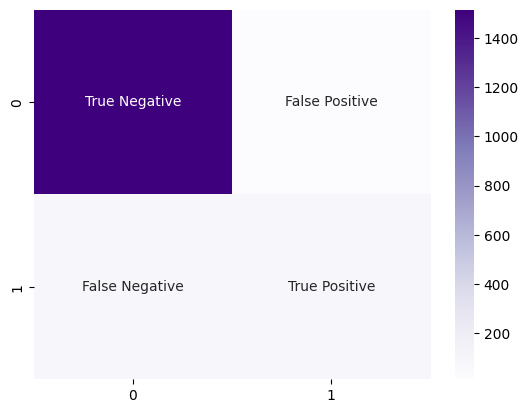

In [ ]:
# Confusion Matrix for third class - Score 5

labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[4], annot=labels, fmt='', cmap='Purples')

# **4. Cleaning the dataset and preprocessing of the data - replies on users reviews**



> Introduction

Cleaning the dataset refers to the process of identifying and handling any inconsistencies, errors, or irrelevant information in the raw data. Preprocessing involves transforming the raw data into a format that is suitable for analysis or machine learning algorithms.

- ***dropna()*** function removes rows where the 'replyContent' column has null values.
- The subset parameter specifies the columns to consider, and inplace=True ensures that the changes are made directly to the original DataFrame (reviews), rather than creating a new one.

In [ ]:
# Delete all null values with function dropna(), we know they are in columns 'replyContent'

reviews.dropna(subset=['replyContent'], inplace=True)

reviews.isnull().sum()

content             0
score               0
replyContent        0
processedContent    0
dtype: int64

Function, named ***cleanText()***, is designed to clean text data by removing various elements such as punctuation (except spaces), numbers, emojis, and converting the text to lowercase. This function can be applied to each text entry in a dataset to preprocess the textual data before analysis or model training.

In [ ]:
# Function to clean text data with regex from punctations, hyperlinks, non-alphabet characters and anything irrelevant

import re

def cleanText(text):
    text = re.sub("[^a-zA-Z']", '', text) # remove all punctuation except spaces
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.encode('ascii', 'ignore').decode('ascii')  # remove emojis
    text = text.lower() # convert to lowercase letters
    return text

***tokenizationAndCleaning()*** function is a comprehensive preprocessing step that combines tokenization, cleaning, lemmatization, and stop word removal to prepare text data.

In [ ]:
# Function to tokenize text, clean it using the previous function with regex and from stop words

import nltk
import spacy
nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")

stopwords = nltk.corpus.stopwords.words('english')
# print(stopwords)

def tokenizationAndCleaning(text):
    # Tokenize using spaCy
    doc = nlp(text)

    # Clean and remove stop words
    cleanWordTokens = [cleanText(token.lemma_) for token in doc if token.is_alpha]

    # Remove stop words
    cleanWordTokensFromStopwords = [w for w in cleanWordTokens if w.lower() not in stopwords]

    return " ".join(cleanWordTokensFromStopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Checking the correctness of the function, by testing the first sentence in the *'replyContent'* column.

In [ ]:
# Testing out the functions on one of the reviews

sentence = reviews['replyContent'][0]

print(sentence)
print("****************")

tokenizationAndCleaning(sentence)

As our team explained profusely, we sync data from the device's native calendar, and not directly from Google. We have worked with many Motorola users in the past, and had no issue with receiving the relevant screenshots from the native calendar app. Once you are able to provide the same, we will do our best to resolve this issue for you asap!
****************


'team explain profusely sync datum device native calendar directly google work many motorola user past issue receive relevant screenshot native calendar app able provide good resolve issue asap'

Applying the *tokenizationAndCleaning* function to each review in the '*replyContent*' column of our DataFrame and storing the processed results in a new column named '*processedReplies*'. This is a common and necessary step in preparing text data for nlp.

In [ ]:
# Applying functions for all repiles in our dataset

reviews['processedReplies'] = [tokenizationAndCleaning(review) for review in reviews['replyContent']]

In [ ]:
# Print out our data set with the new column

reviews

,content,score,replyContent,processedContent,processedReplies
0,Unable to use it as it won't work with my Goog...,1,"As our team explained profusely, we sync data ...",unable use work google calendar tech support h...,team explain profusely sync datum device nativ...
1,I downloaded this because of the cross platfor...,1,The Premium ad only shows up when first openin...,download cross platform sync purchase app lear...,premium ad show first open app click premium f...
2,I am starting to hate this app! Every time the...,1,"Hi, please note that these issues usually are ...",start hate app every time update start exact p...,hi please note issue usually result calendar s...
3,"Liked Any.do at first, enough that I even sign...",1,Please note that Any.do integrates directly wi...,liked first enough even sign premium could sch...,please note integrate directly google calendar...
4,They made me sign up for premium just to have ...,1,"We never require users to upgrade, as 90% of t...",make sign premium recur alert even hourly opti...,never require user upgrade app completely free...
...,...,...,...,...,...
16101,Good Planner overall,4,"Hi, if you have any ideas about improving the ...",good planner overall,hi idea improve app please contact appreciate
16103,Works good,4,"Hi, if you have any ideas about improving the ...",work good,hi idea improve app please contact appreciate
16105,Its very effective tool for daily tasks and ev...,4,"Hi, if you have any ideas about improving the ...",effective tool daily task event plus long term...,hi idea improve app please contact appreciate
16106,Next best thing to using F. Covey when I was w...,4,"Hi, if you have any ideas about improving the ...",next good thing use covey work,hi idea improve app please contact appreciate


These next parts of the code are used to find and visualize the most frequent words in reviews that gave an app a score of 1/2/3/4/5 in the *'processedReplies'* . This is important for us to visualise and understand common complaints/issues/satisfaction/neutral thoughts reported by replies from the developers or other users that reply.

*Most frequent words in replies on user review that gave an app a score of 1*

The words in this list are individual tokens extracted from the replies on user reviews. They include a mix of nouns, verbs, adjectives, and other parts of speech. Commonly occurring words like "help", "hi", "sorry", and "issue" suggest key areas of reply types for the.

Here some words that are mostly used like "app" do not give us the emotion of a typical reply because most sentences begin or have the word "app" in them, because of the structure of it.

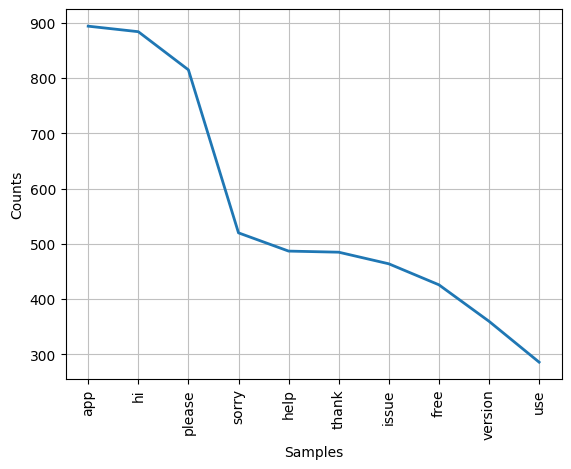

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Get data about most used words when the app score is 1

allWordsScoreOne = []

for review in reviews[reviews['score'] == 1]['processedReplies']:
  for word in nltk.word_tokenize(review):
    allWordsScoreOne.append(word)

nltk.FreqDist(allWordsScoreOne).plot(10)

This segment employs nlp technique to identify and visualize the most frequent words associated with user reviews that have a score of one.

Using the N*atural Language Toolkit's* *FreqDist* function, it generates a frequency distribution of words in the specified reviews.
- The 10 most common words and their frequencies are then extracted.
- The code calculates the average percentage of each of these top words in the dataset.
- Finally, it visualizes this information through a bar chart, providing a clear representation of the relative prevalence of key words in reviews with a score of one.








[('app', 894), ('hi', 884), ('please', 815), ('sorry', 520), ('help', 487), ('thank', 485), ('issue', 464), ('free', 426), ('version', 360), ('use', 286)]


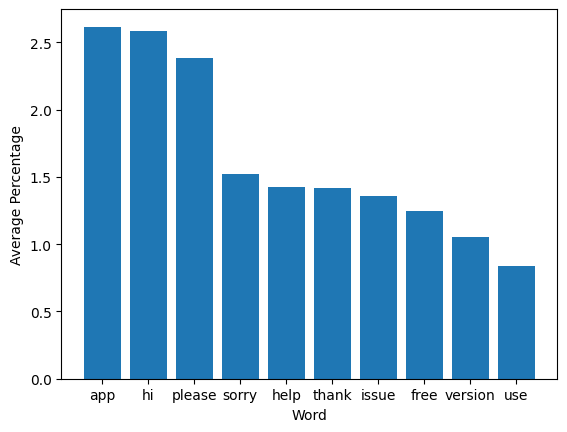

In [ ]:
# Most common words for the score one
import matplotlib.pyplot as plt

fdist = nltk.FreqDist(allWordsScoreOne)

mostCommonWordsOne = fdist.most_common(10)
print(mostCommonWordsOne)

totalWords = len(allWordsScoreOne)
averagePercentages = {word: (count / totalWords) * 100 for word, count in mostCommonWordsOne}

plt.figure()
plt.bar(averagePercentages.keys(), averagePercentages.values())
plt.xlabel('Word')
plt.ylabel('Average Percentage')
plt.show()


*Most frequent words in replies on user review that gave an app a score of 2*

The words in this list are individual tokens extracted from the replies on user reviews. They include a mix of nouns, verbs, adjectives, and other parts of speech. Commonly occurring words like "feedback", "thank", "please", and "version" suggest key areas of reply types for the user review.

Here some words that are mostly used like "hi" do not give us the emotion of a typical reply because most sentences begin or have the word "hi" in them, because of the structure of it.

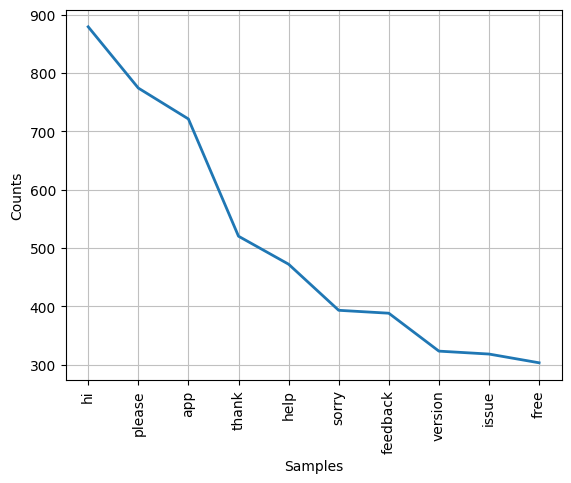

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Get data about most used words when the app score is 2

allWordsScoreTwo = []

for review in reviews[reviews['score'] == 2]['processedReplies']:
  for word in nltk.word_tokenize(review):
    allWordsScoreTwo.append(word)


nltk.FreqDist(allWordsScoreTwo).plot(10)

[('hi', 879), ('please', 774), ('app', 721), ('thank', 520), ('help', 472), ('sorry', 393), ('feedback', 388), ('version', 323), ('issue', 318), ('free', 303)]
Average Percentages: {'hi': 2.8279123636714605, 'please': 2.4901071325161666, 'app': 2.3195959205996846, 'thank': 1.6729401923881222, 'help': 1.5185149438599876, 'sorry': 1.2643567223241, 'feedback': 1.2482707589357527, 'version': 1.0391532348872374, 'issue': 1.0230672714988902, 'free': 0.9748093813338481}


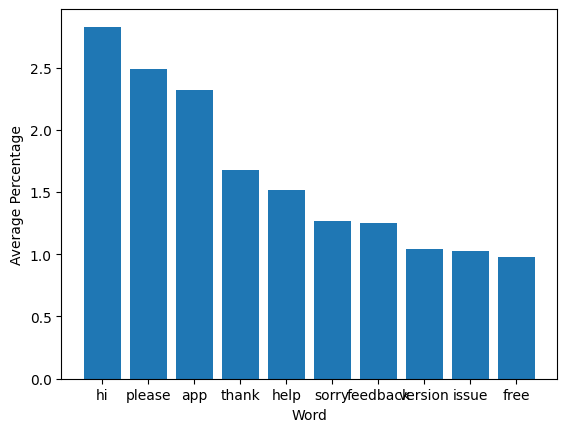

In [ ]:
# Most common words for score two

fdist = nltk.FreqDist(allWordsScoreTwo)

mostCommonWordsTwo = fdist.most_common(10)
print(mostCommonWordsTwo)

totalWords = len(allWordsScoreTwo)
averagePercentages = {word: (count / totalWords) * 100 for word, count in mostCommonWordsTwo}
print("Average Percentages:", averagePercentages)

# plot the average percentages
plt.figure()
plt.bar(averagePercentages.keys(), averagePercentages.values())
plt.xlabel('Word')
plt.ylabel('Average Percentage')
plt.show()

*Most frequent words in replies on user review that gave an app a score of 3*

The words in this list are individual tokens extracted from the replies on user reviews. They include a mix of nouns, verbs, adjectives, and other parts of speech. Commonly occurring words like "thank", "please", "feedback", and "help" suggest key areas of reply types for the user review.

Here some words that are mostly used like "hi" do not give us the emotion of a typical reply because most sentences begin or have the word "app" in them, because of the structure of it.

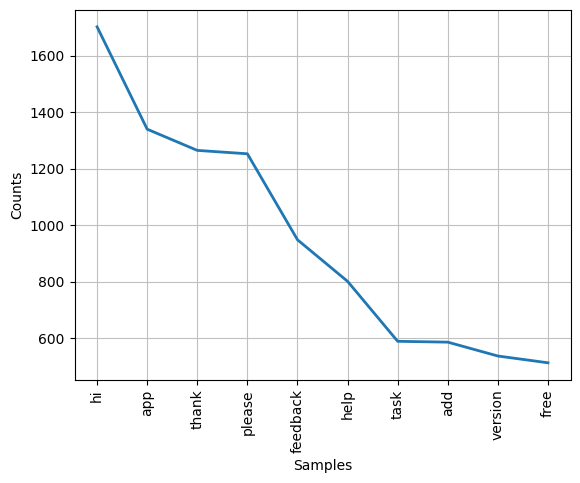

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Get data about most used words when the app score is 3

allWordsScoreThree = []

for review in reviews[reviews['score'] == 3]['processedReplies']:
  for word in nltk.word_tokenize(review):
    allWordsScoreThree.append(word)

nltk.FreqDist(allWordsScoreThree).plot(10)


[('hi', 1702), ('app', 1340), ('thank', 1265), ('please', 1253), ('feedback', 949), ('help', 802), ('task', 590), ('add', 587), ('version', 538), ('free', 514)]
Average Percentages: {'hi': 3.117901370264527, 'app': 2.4547519601377594, 'thank': 2.3173591265479594, 'please': 2.2953762731735914, 'feedback': 1.7384773210229354, 'help': 1.4691873671869276, 'task': 1.0808236242397598, 'add': 1.0753279108961675, 'version': 0.9855645929508318, 'free': 0.9415988862020956}


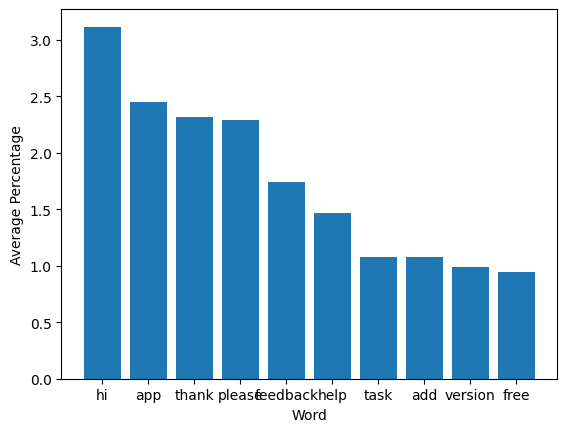

In [ ]:
# Most common words for score 3

fdist = nltk.FreqDist(allWordsScoreThree)

mostCommonWordsThree = fdist.most_common(10)
print(mostCommonWordsThree)

totalWords = len(allWordsScoreThree)
averagePercentages = {word: (count / totalWords) * 100 for word, count in mostCommonWordsThree}
print("Average Percentages:", averagePercentages)

# plot the average percentages
plt.figure()
plt.bar(averagePercentages.keys(), averagePercentages.values())
plt.xlabel('Word')
plt.ylabel('Average Percentage')
plt.show()

*Most frequent words in replies on user review that gave an app a score of 4*

The words in this list are individual tokens extracted from the replies on user reviews. They include a mix of nouns, verbs, adjectives, and other parts of speech. Commonly occurring words like "hi", "suggestion", "review", and "please" suggest key areas of reply types for the user review.

Here some words that are mostly used like "thank" do not give us the emotion of a typical reply because most sentences begin or have the word "app" in them, because of the structure of it.

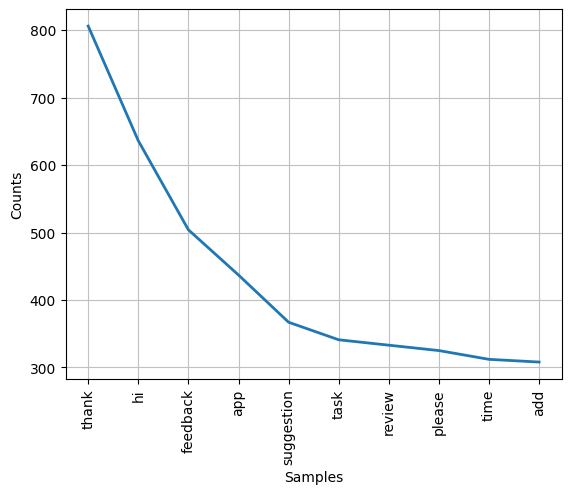

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Get data about most used words when the app score is 4

allWordsScoreFour = []

for review in reviews[reviews['score'] == 4]['processedReplies']:
  for word in nltk.word_tokenize(review):
    allWordsScoreFour.append(word)

nltk.FreqDist(allWordsScoreFour).plot(10)

[('thank', 806), ('hi', 636), ('feedback', 504), ('app', 437), ('suggestion', 367), ('task', 341), ('review', 333), ('please', 325), ('time', 312), ('add', 308)]
Average Percentages: {'thank': 3.827523981384747, 'hi': 3.0202298413904454, 'feedback': 2.393389685630164, 'app': 2.0752208186912338, 'suggestion': 1.7428055845759332, 'task': 1.619337069047393, 'review': 1.581346756577073, 'please': 1.5433564441067529, 'time': 1.4816221863424828, 'add': 1.4626270301073225}


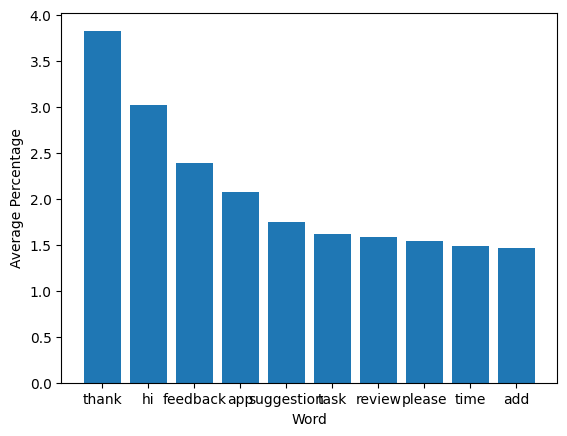

In [ ]:
# Most common words for score 4

fdist = nltk.FreqDist(allWordsScoreFour)

mostCommonWordsFour = fdist.most_common(10)
print(mostCommonWordsFour)

totalWords = len(allWordsScoreFour)
averagePercentages = {word: (count / totalWords) * 100 for word, count in mostCommonWordsFour}
print("Average Percentages:", averagePercentages)

# plot the average percentages
plt.figure()
plt.bar(averagePercentages.keys(), averagePercentages.values())
plt.xlabel('Word')
plt.ylabel('Average Percentage')
plt.show()

*Most frequent words in replies on user review that gave an app a score of 5*

The words in this list are individual tokens extracted from the replies on user reviews. They include a mix of nouns, verbs, adjectives, and other parts of speech. Commonly occurring words like "hi", "feedback", "review", and "version" suggest key areas of reply types for the user review.

Here some words that are mostly used like "thank" do not give us the emotion of a typical reply because most sentences begin or have the word "app" in them, because of the structure of it.

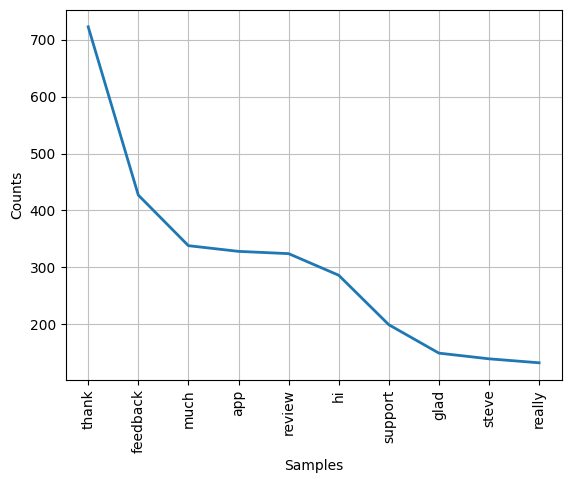

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Get data about most used words when the app score is 5

allWordsScoreFive = []

for review in reviews[reviews['score'] == 5]['processedReplies']:
  for word in nltk.word_tokenize(review):
    allWordsScoreFive.append(word)

nltk.FreqDist(allWordsScoreFive).plot(10)

[('thank', 723), ('feedback', 427), ('much', 338), ('app', 328), ('review', 324), ('hi', 286), ('support', 199), ('glad', 149), ('steve', 139), ('really', 132)]
Average Percentages: {'thank': 7.281700070500554, 'feedback': 4.300533789908349, 'much': 3.4041696041897476, 'app': 3.303454527142713, 'review': 3.2631684963238996, 'hi': 2.880451203545171, 'support': 2.0042300332359755, 'glad': 1.5006546480008056, 'steve': 1.3999395709537719, 'really': 1.329439017020848}


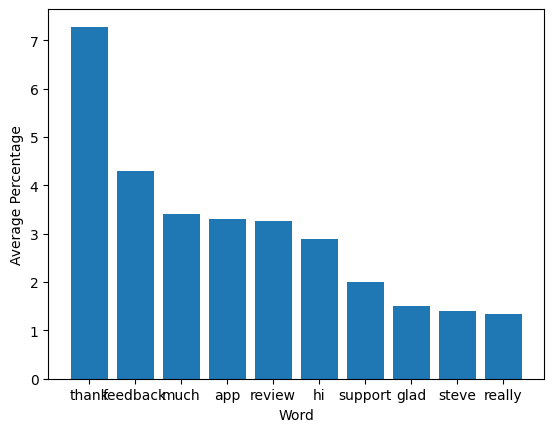

In [ ]:
# Most common words for score 5

fdist = nltk.FreqDist(allWordsScoreFive)

mostCommonWordsFive = fdist.most_common(10)
print(mostCommonWordsFive)

totalWords = len(allWordsScoreFive)
averagePercentages = {word: (count / totalWords) * 100 for word, count in mostCommonWordsFive}
print("Average Percentages:", averagePercentages)

# plot the average percentages
plt.figure()
plt.bar(averagePercentages.keys(), averagePercentages.values())
plt.xlabel('Word')
plt.ylabel('Average Percentage')
plt.show()